In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
import PIL  # might need to do `conda/pip install Pillow`
%pip install emcee # do this here as i run it on google collab
%pip install corner
import emcee
import corner

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 773.7 kB/s eta 0:00:00


# Problem 1 (35 points)
For this problem, we will look at the importance of rescaling data and dimensionality reduction using principal component analysis (PCA) for classifying highly-dimensional data using $K$-means clustering.

We are going to use a dataset that contains different quanlities of wine, and classifies them as coming from one of three different cultivators. The properties are things like alcohol content, presence of certain minerals, and color of the wine (quantified numerically). If you would like more information, refer to the [documentation about the dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset).

## a. (5 points)
Read in the dataset. Get both the `data` (the data for each wine in each category) and `target` (which cultivator they are from), and save them as variables to use for training.

In [17]:
loaded_data = load_wine()
data = loaded_data.data
target = loaded_data.target

assert data.shape == (178, 13)
assert target.shape == (178,)

## b. (5 points)
Perform a multi-dimensional fit on the data using $K$-means clustering (i.e., with no dimensionality reduction). Note that there are 3 classes, so you should perform a fit using that many clusters.

In [18]:
# ref: https://realpython.com/k-means-clustering-python/
k_means = KMeans(n_clusters=3, n_init=10, random_state=42)
k_means.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=42)

## c. (5 points)
Compare the output of the $K$-means fit with the labels of the data (contained in `target`). How does the labeling of the predicted classes agree with the actual labels? (_N.B._: You may have to permute the labeling between the output of the `KMeans` function and the `target` values, as the labeling in `KMeans` is arbitrary.)

In [19]:
cluster_centers = k_means.cluster_centers_
# we will use the pairwise_distances_argmin for k_means
# ref: https://github.com/plaplant/CS489/blob/main/lessons/kmeans.ipynb
k_means_labels = pairwise_distances_argmin(data, cluster_centers) # from github note
# -> use pairwise_distances_argmin to get the labels for each point in the data

# permute the labeling between our output of Kmeans and the target labels
# so that we can compare them
# ref: https://stackoverflow.com/questions/45263063/k-means-permute-clusters
from scipy.stats import mode
labels = np.zeros_like(k_means_labels)
for i in range(3): # we use 3 as we have 3 classes
    mask = (k_means_labels == i)
    labels[mask] = mode(target[mask])[0]



# print out the results
print("k mean res: ", k_means_labels)
print("target: ", target)
print("after permu:", labels)

# add some words commenting on the output!


# we can see that the k mean result is not the same as the target, so we need to permute the k mean result
# after permu, we have somewhat similar result as the target -> it is still not good enough
# could be the way that I compute it wrong

k mean res:  [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]
target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
after permu: [0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1

## d. (5 points)
Repeat the fit using $K$-means clustering, but this time perform PCA using 2 principal components to reduce the dimensionality of your data. Do _not_ rescale the data first (we will do this later!).

In [20]:
# Perform PCA with 2 principal components
pca = PCA(n_components=2)
pca.fit(data)

# Transform the data to the first two principal components
new_data = pca.transform(data)

# Perform K-means clustering on the transformed data
new_k_means = KMeans(n_clusters=3, n_init=10, random_state=42)
new_k_means.fit(new_data)

# Get the labels assigned by K-means
new_k_means_labels = new_k_means.labels_

# Print the labels
print("labels: ", new_k_means_labels)
print("target: ", target)

# more words!
# from the result, it look quite off, like the labels and targets seem not really identical
# could be that we did not perfom PCA yet?

labels:  [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]
target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## e. (5 points)
Make two scatter plots: (1) the data in the low-dimensional PCA space (i.e., the first two principal components) color-coded by the actual labels (i.e., the `target` values), and (2) the data color-coded by the predicted $K$-means classes (and the cluster centers). Does it seem like the $K$-means fit has done a good job?

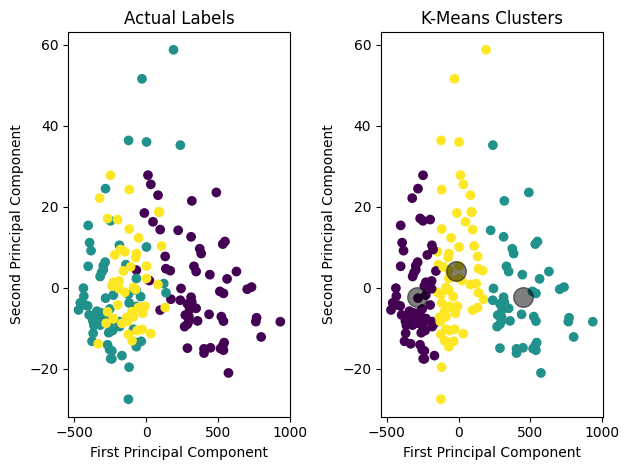

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2)

# make scatter-plot 1
X_pca = pca.transform(data)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=target)  # assuming 'target' is your actual labels
ax1.set_title('Actual Labels')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# make scatter-plot 2
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=k_means_labels)
centers = new_k_means.cluster_centers_
ax2.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)  # plot cluster centers
ax2.set_title('K-Means Clusters')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')

# Adjust the layout so everything fits nicely
plt.tight_layout()

# Display the plot
plt.show()

# from the clusterplot, i feel like it did a good job as we can see dots are seperate
# although there are few that overlap but we still can see that comapre to actual, it
# fit well

## f. (5 points)
Redo part (d), but this time using a `StandardScaler` transformation before doing PCA.

In [31]:
# Scale the data
scaler = StandardScaler()
scaler.fit(data)
X_rescale = scaler.transform(data)

# Perform PCA with 2 principal components
pca_rescale = PCA(n_components=2)
pca_rescale.fit(X_rescale)

# Transform the data to the first two principal components
new_data_rescale = pca_rescale.transform(X_rescale)

# Perform K-means clustering on the transformed data
new_k_means_rescale = KMeans(n_clusters=3, n_init=10)
new_k_means_rescale.fit(new_data_rescale)

# Get the labels assigned by K-means
new_k_means_labels_rescale = new_k_means_rescale.labels_

print("label: ", new_k_means_labels_rescale)
print("target: ", target)

label:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## g. (5 points)
Redo part (e), but with the rescaled PCA data. Does it look better than before?

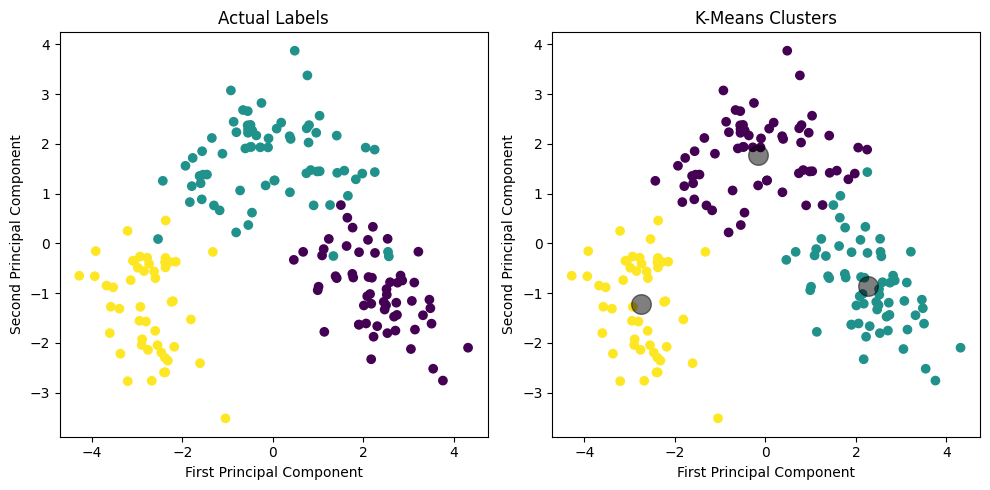

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# make scatter-plot 1
X_pca_rescale = pca_rescale.transform(X_rescale)
ax1.scatter(X_pca_rescale[:, 0], X_pca_rescale[:, 1], c=target)
ax1.set_title('Actual Labels')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# make scatter-plot 2
ax2.scatter(X_pca_rescale[:, 0], X_pca_rescale[:, 1], c=new_k_means_labels_rescale)
centers_rescale = new_k_means_rescale.cluster_centers_
ax2.scatter(centers_rescale[:, 0], centers_rescale[:, 1], c='black', s=200, alpha=0.5)  # plot cluster centers
ax2.set_title('K-Means Clusters')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')

plt.tight_layout()
plt.show()

#wow, standard scaler + PCA really a good method to do this cluster

# Problem 2 (35 points)
We can use the two-dimensional fast Fourier transform (FFT) to filter and process image-based data. We will do some of these operations on data. We'll be using a sample image from SciPy as an example.

## a. (5 points)
Make a grayscale plot of the image to work with.

<ipython-input-47-f8521ef1e5d1>:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  f = misc.face()


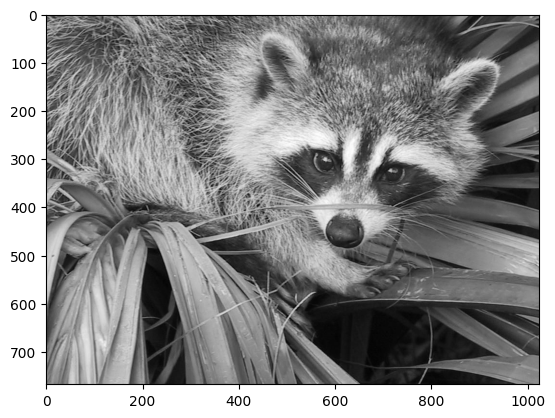

In [47]:
# load image
f = misc.face()
# convert to Pillow image
image = PIL.Image.fromarray(f)
# make gray-scale
gray_image = image.convert("L")
# normalize
gray_image /= np.amax(gray_image)
# extract bitmap as 2d array
data = np.asarray(gray_image)

# make a plot
fig = plt.figure()
ax = plt.gca()
ax.imshow(data, cmap="gray")
plt.show()

#raccon

## b. (5 points)
Compute a 2D FFT of the image. You may use the `np.fft` module for the calculation. (_N.B._: Even though we could use the space-saving trick of a real FFT we talked about, use the "normal" FFT. It makes the rest of the problems easier!)

In [48]:
# Compute the 2D FFT of the image
# https://numpy.org/doc/stable/reference/routines.fft.html
fft_data = np.fft.fft2(data)

assert fft_data.shape == (768, 1024)
assert fft_data.dtype == np.complex128

## c. (5 points)
Make 2 plots: (1) the amplitude of the resulting Fourier coefficients, and (2) the phase of the coefficients. (_N.B._: When making plots, it might be helpful to use the `np.fft.fftshift` function to make sure that the main features of the plot are centered on the resulting image. Also, when plotting the amplitude, you may find it helpful to use the `vmax=300` keyword argument to show the key features of the plot. You may find the `np.angle` function helpful for computing the phase.)

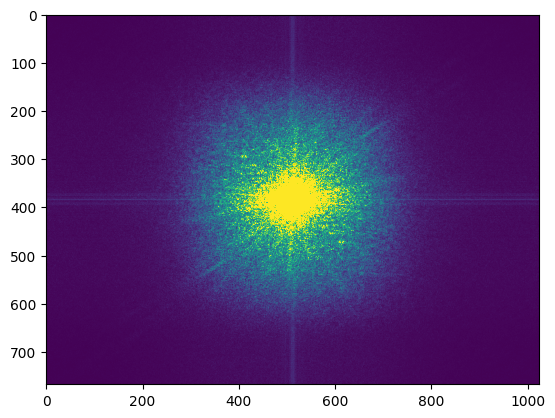

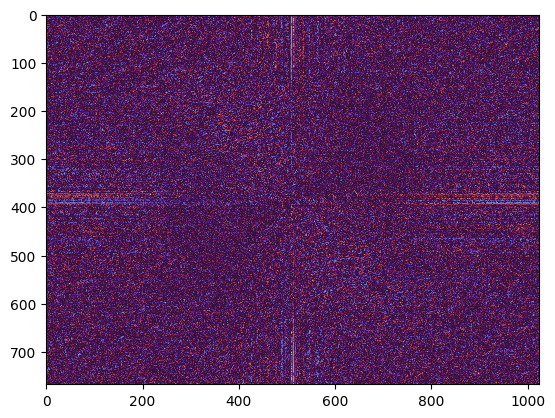

In [49]:
fig1 = plt.figure()
ax1 = plt.gca()

# Compute the amplitude of the Fourier coefficients
# https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html
fft_amp = np.abs(np.fft.fftshift(fft_data))
ax1.imshow(fft_amp, vmax=300, cmap="viridis")

fig2 = plt.figure()
ax2 = plt.gca()

# Compute the phase of the Fourier coefficients
# https://numpy.org/doc/stable/reference/generated/numpy.angle.html
fft_phase = np.angle(np.fft.fftshift(fft_data))
ax2.imshow(fft_phase, cmap="twilight")

plt.show()

## d. (5 points)
As we discussed, we can apply a Gaussian filter to our image by performing a convolution operation in Fourier space. Compute a Gaussian function (sometimes called a "smoothing kernel") that will operate in Fourier space. This should be the same size and as your `fft_data` array. It will be a two-dimensional, real-valued function of $x$ and $y$. It works best if it's normalized (i.e., so the largest value is 1), and requires a $\sigma$ that defines the approximate number of pixels included in a smoothing operation. Choose $\sigma = 30$, and plot your resulting Gaussian filter. (_N.B._: You may find it easier to define the filter so that it is centered on the center of the image. You can then use the `np.fft.fftshift` function before multiplying with the actual FFT data.)

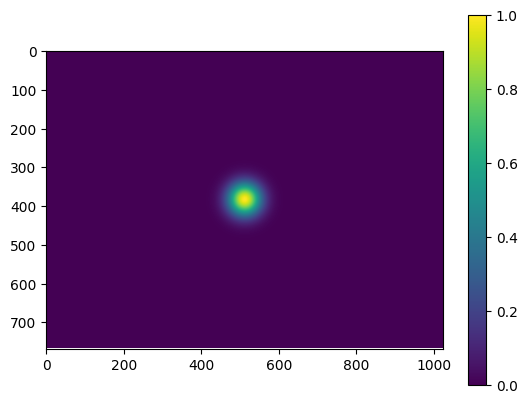

In [50]:
# Define x and y
x = np.arange(0, fft_data.shape[0])
y = np.arange(0, fft_data.shape[1])

# Create a meshgrid
XX, YY = np.meshgrid(x, y, indexing="ij")

# Define the center of the Gaussian
# the given code is fft_out but we never define it? so i chnage it into fff_data
xmu = fft_data.shape[0] // 2
ymu = fft_data.shape[1] // 2

# Compute the Gaussian filter
# https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm
sigma = 30
gaussian = np.exp(-((XX - xmu)**2 + (YY - ymu)**2) / (2 * sigma**2))

# Normalize the Gaussian filter to unity
gaussian /= np.amax(gaussian)

assert gaussian.shape == fft_data.shape

# Plot the Gaussian filter
plt.imshow(gaussian)
plt.colorbar()
plt.show()

## e. (5 points)
Apply your Gaussian filter to the FFT array. As noted above, you may need to use the `np.fft.fftshift` function to make sure your Guassian filter and FFT coefficients line up. Apply an inverse FFT to your convolved data, and plot the resulting image. (_N.B._: You may need to explicitly take the real component of the resulting array with the `.real` attribute.) Your output image should look like the `gaussian_blur.png` image.

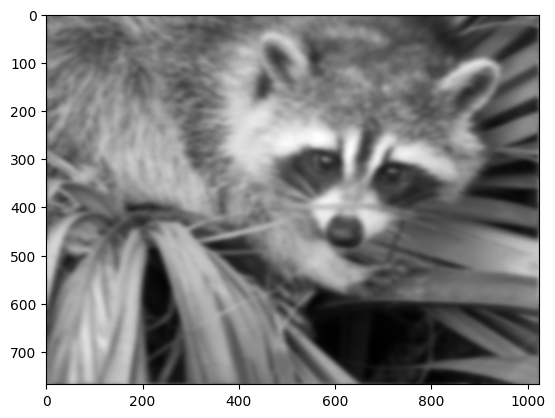

In [51]:
# Apply the Gaussian filter to the FFT array
filtered_data = np.fft.fftshift(gaussian) * fft_data

# Compute the inverse FFT
filtered_image = np.fft.ifft2(filtered_data)

fig = plt.figure()
ax = plt.gca()

# Plot the resulting image
ax.imshow(filtered_image.real, cmap="gray")
plt.show()

## f. (5 points)
We can also perform operations known as "high-pass" or "low-pass" filtering, where we only preserve information in Fourier space on small scales or large scales (respectively). To do this, we need to know the length of our "Fourier vectors", which we can do with the `np.fft.fftfreq` function. We are going to build the one-dimensional arrays for each of our $x$- and $y$-dimensions, and then compute the magnitude of the vectors (which we need for the filtering).

Make an image of the data using a low-pass filter, where we only keep modes with $k = \sqrt{k_x^2 + k_y^2} < 0.01$. Your output image should look like `lowpass.png`.

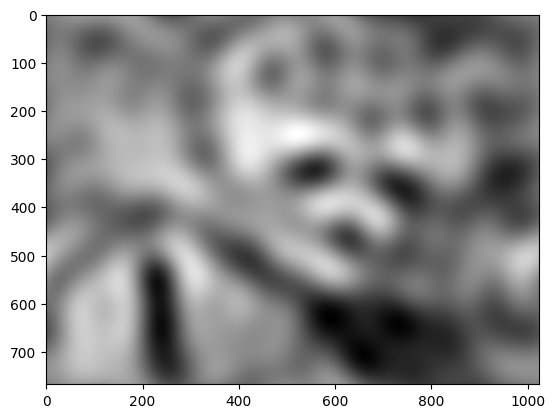

In [52]:
# Compute the Fourier frequencies for each dimension
kx = np.fft.fftfreq(fft_data.shape[0])
ky = np.fft.fftfreq(fft_data.shape[1])

# Create a meshgrid
KX, KY = np.meshgrid(kx, ky, indexing="ij")

# # Compute the magnitude of the frequency vectors
KK = np.sqrt(KX**2 + KY**2)

# Perform the Fourier filtering
# Perform the Fourier filtering. For pixels where k < 0.01, you should
# save the Fourier coefficient in fft_data. For pixels where k > 0.01,
# you should have 0. You can do this using nested for-loops, or in a
# single line using a numpy function.
fft_lowpass = fft_data * (KK < 0.01) # create filter that only keep modes w/ kk < 0.01

assert fft_lowpass.shape == fft_data.shape

# Apply the inverse FFT to the lowpass image
lowpass_image = np.fft.ifft2(fft_lowpass)

fig = plt.figure()
ax = plt.gca()

# Plot the resulting image
ax.imshow(lowpass_image.real, cmap="gray")
plt.show()

## g. (5 points)
Repeat the same steps as in part (f), but now only keeping values where $k > 0.01$. Plot the resulting image. It should look like `highpass.png`.

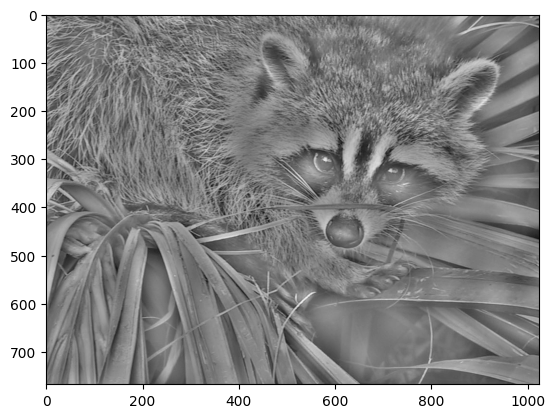

In [53]:
# Perform the Fourier filtering
fft_highpass = fft_data * (KK > 0.01)

assert fft_highpass.shape == fft_data.shape

# Apply the inverse FFT to the highpass image
highpass_image = np.fft.ifft2(fft_highpass)

fig = plt.figure()
ax = plt.gca()

# Plot the resulting image
ax.imshow(highpass_image.real, cmap="gray")
plt.show()

# Problem 3 (30 points)

As we saw in class, MCMC is a useful general-purpose method for performing fits to data. We saw an example of fitting the slope and intercept of a line, but it's flexible enough to handle any model (including, for instance, a cubic polynomial...).

## a. (5 points)
Read in the data from `problem2.txt`. As usual, Column 0 is the $x$-values, Column 1 is the $y$-values, and Column 2 is the $y$-error bars.

In [55]:
# read txt file
data =  np.loadtxt("problem2.txt")
x = data[:, 0]
y = data[:, 1]
yerr = data[:, 2]

## b. (10 points)
Define the functions that describe the (log) prior probabilities, the (log) posterior probabilities, and the (log) likelihood for our problem. As before, we want to assume a cubic model of the form:
$$
f(x; \vec{\theta}) = a_0 + a_1 x + a_2 x^2 + a_3 x^3,
$$
where $\vec{\theta} = (a_0, a_1, a_2, a_3)$. Assume a Gaussian likelihood, which includes the uncertainty on different values.

(_N.B._: The precise choice of priors should not matter, if we have a sufficiently long MCMC chain. For specificity, let us assume uniform priors for each of our parameters on the interval $-10 < a_i < 10$.)

In [57]:
def logprior(theta):
    """
    Compute the (log) prior based on the input values.

    Parameters
    ----------
    theta : length-4 tuple
        The parameters of our model.

    Returns
    -------
    float
        The log prior probability. If any of the values are outside
        of our prior range, we should return -np.inf (because the
        probability is 0, so the log probability is -np.inf). If all
        4 of our parameters are in the prior range, we return 0 (because
        log(1) = 0).
    """
    a0, a1, a2, a3 = theta
    if np.any(abs(theta) > 10):
        return -np.inf

    return 0

def loglikelihood(theta, x, y, yerr):
    """
    Compute the (log) likelihood based on the input values and our data.

    Parameters
    ----------
    theta : length-4 tuple
        The parameters of our model.
    x : 1d array of floats
        The x values of our input data. Shape (n,).
    y : 1d array of floats
        The y values of our input data. Shape (n,).
    yerr : 1d array of floats
        The error values of our measurements. Shape (n,).

    Returns
    -------
    loglik : float
        The log likelihood of our model based on the input values and our
        data values.
    """
    a0, a1, a2, a3 = theta
    # compute the model value based on x and a_i values
    model = a0 + a1 * x + a2 * x**2 + a3 * x**3
    # compute the log likelihood
    # https://www.statisticshowto.com/log-likelihood-function/
    loglik = -0.5 * np.sum(((y - model) / yerr)**2 + np.log(2 * np.pi * yerr**2))

    return loglik

def logposterior(theta, x, y, yerr):
    """
    Compute the (log) posterior probability based on the prior and likelihood values.

    Parameters
    ----------
    theta : length-4 tuple
        The parameters of our model.
    x : 1d array of floats
        The x values of our input data. Shape (n,).
    y : 1d array of floats
        The y values of our input data. Shape (n,).
    yerr : 1d array of floats
        The error values of our measurements. Shape (n,).

    Returns
    -------
    float
        The log of the posterior probability.
    """
    lp = logprior(theta)

    # check if our prior is finite
    if not np.isfinite(lp):
        return -np.inf

    # Recall our posterior is the prior times the likelihood. We're working
    # in log space, so multiplications become additions!
    return lp + loglikelihood(theta, x, y, yerr)

## c. (5 points)
Run an MCMC chain with 32 walkers. Initialize your guess for the parameters as 0, with some random scatter. (_N.B._: Make sure the scatter is small enough that your parameters do not fall outside the region allowed by your priors!) Run for a few thousand steps.

In [59]:
n_walkers = 32
n_dims = 4  # 4 parameters in our model
n_samples = 75000  # number of samples in our MCMC chains

mu = np.zeros(n_dims)
sigma = 0.1  # small enough scatter to not fall outside the prior range
rng = np.random.default_rng()
init_vals = rng.normal(mu, sigma, size=(n_walkers, n_dims))

arglist = (x, y, yerr)

sampler = emcee.EnsembleSampler(n_walkers, n_dims, logposterior, args=arglist)
sampler.run_mcmc(init_vals, n_samples, progress=True);

100%|██████████| 75000/75000 [02:16<00:00, 551.31it/s]


## d. (5 points)
Make a corner plot of the resulting parameters.

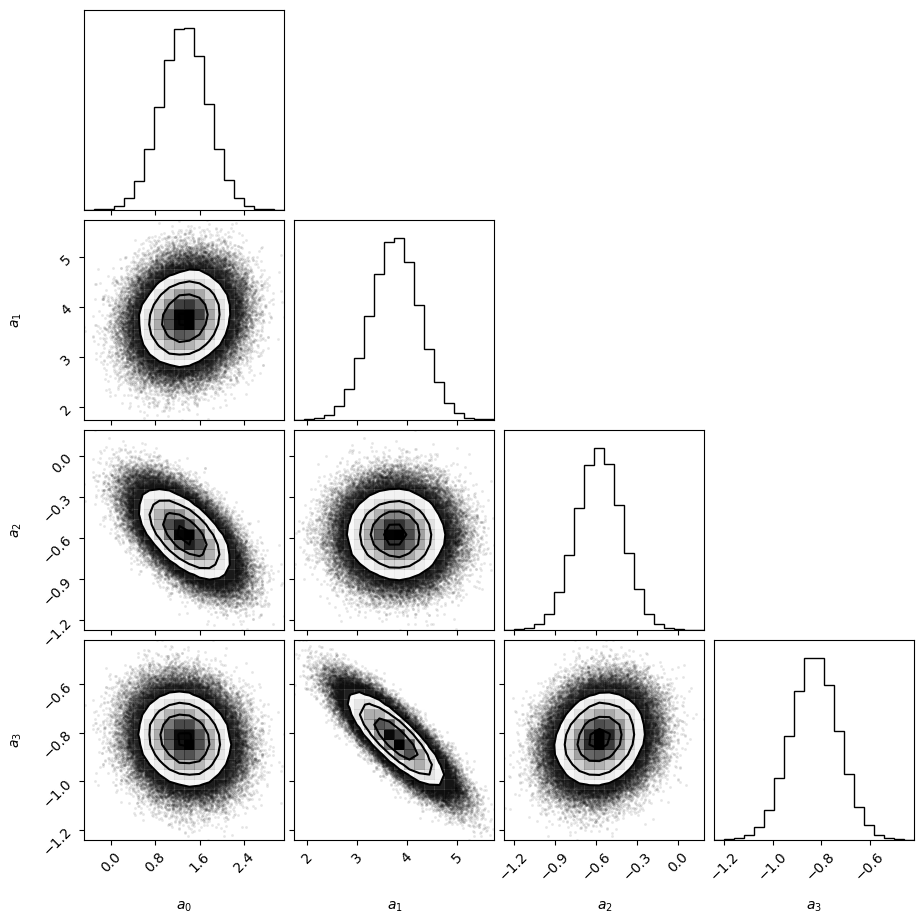

In [61]:
# Flatten the samples from the MCMC chain
# https://github.com/plaplant/CS489/blob/main/lessons/mcmc.ipynb
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)

labels = ["$a_0$", "$a_1$", "$a_2$", "$a_3$"]

# Create a corner plot
fig = corner.corner(flat_samples, labels=labels)

## e. (5 points)
Make a plot of the input data, along with 100 different random models sampled by the MCMC chains. To do this, you should select several points in your chain, and plot the resulting model associated with those parameters. Does it seem like the model is a good fit for the data?

<ErrorbarContainer object of 3 artists>

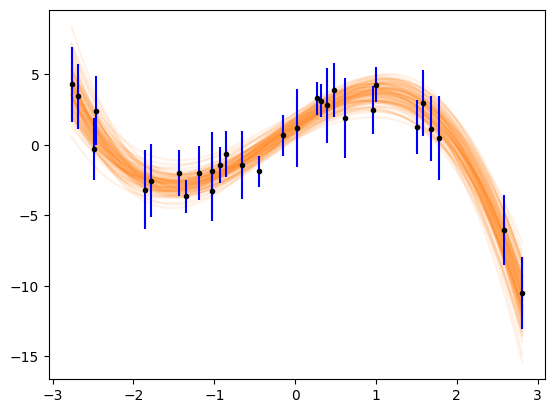

In [ ]:
fig = plt.figure()
ax = plt.gca()
# https://github.com/plaplant/CS489/blob/main/lessons/mcmc.ipynb
inds = rng.integers(len(flat_samples), size=100)
x_model = np.linspace(min(x), max(x), 500)
for ind in inds:
    sample = flat_samples[ind]
    y_model = sample[0] + sample[1] * x_model + sample[2] * x_model**2 + sample[3] * x_model**3
    ax.plot(x_model, y_model, "C1", alpha=0.1)

# also plot the data with error bars
ax.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0, ecolor='blue')

# yes, it look quite a good fit based on the plot that we have